In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# constants
RAM_MAX = 927

In [21]:
# experiment results
columns = ['nn_name', 'depth', 'pic_size', 
           'r_fps', 'r_image_proc_time', 'r_cpu_load', 'r_temp', 'r_ram',
           'm_fps', 'm_image_proc_time', 'm_cpu_load', 'm_temp', 'm_ram']

first_row = [('mobilenet_v1_0.25_128', 0.25, 128, 14, 0.06, 0.37, 69, 208, 25, 0.013, 0.13, 65, 199),
            ('mobilenet_v1_0.25_160', 0.25, 160, 12, 0.08, 0.4, None, None, 24, 0.015, 0.18, None, None),
            ('mobilenet_v1_0.25_192', 0.25, 192, 9, 0.1, 0.43, None, None, 22, 0.02, 0.2, None, None),
            ('mobilenet_v1_0.25_224', 0.25, 224, 8, 0.11, 0.51, None, None, 20, 0.03, 0.25, None, None),
            
             ('mobilenet_v1_0.5_128', 0.5, 128, 9, 0.1, 0.44, None, None, 22, 0.015, 0.17, None, None),
            ('mobilenet_v1_0.5_160', 0.5, 160, 7.8, 0.12, 0.52, None, None, 22, 0.025, 0.2, None, None),
            ('mobilenet_v1_0.5_192', 0.5, 192, 6.5, 0.16, 0.56, None, None, 21, 0.03, 0.25, None, None),
            ('mobilenet_v1_0.5_224', 0.5, 224, 5.3, 0.18, 0.65, None, None, 20, 0.04, 0.26, None, None),
            
            ('mobilenet_v1_0.75_128', 0.75, 128, 7, 0.15, 0.53, None, None, 19, 0.02, 0.19, None, None),
            ('mobilenet_v1_0.75_160', 0.75, 160, 5.4, 0.18, 0.58, None, None, 18, 0.03, 0.2, None, None),
            ('mobilenet_v1_0.75_192', 0.75, 192, 4.4, 0.22, 0.68, None, None, 17, 0.035, 0.21, None, None),
            ('mobilenet_v1_0.75_224', 0.75, 224, 3.4, 0.29, 0.67, None, None, 17, 0.045, 0.23, None, None),
            
            ('mobilenet_v1_1.0_128', 1.0, 128, 5, 0.2, 0.57, None, None, 18, 0.025, 0.19, None, None),
            ('mobilenet_v1_1.0_160', 1.0, 160, 3.8, 0.25, 0.66, None, None, 16, 0.034, 0.2, None, None),
            ('mobilenet_v1_1.0_192', 1.0, 192, 3, 0.32, 0.68, None, None, 16, 0.043, 0.21, None, None),
            ('mobilenet_v1_1.0_224', 1.0, 224, 2.6, 0.38, 0.77, 83, 280, 15, 0.06, 0.21, 65, 197)]

exp_results = pd.DataFrame(data = first_row,
             columns = columns)
exp_results['x'] = exp_results['depth'].astype('str') + '_' + exp_results['pic_size'].astype('str')
exp_results['r_ram_load'] = exp_results['r_ram'] / RAM_MAX
exp_results['m_ram_load'] = exp_results['m_ram'] / RAM_MAX
exp_results

,nn_name,depth,pic_size,r_fps,r_image_proc_time,r_cpu_load,r_temp,r_ram,m_fps,m_image_proc_time,m_cpu_load,m_temp,m_ram,x,r_ram_load,m_ram_load
0,mobilenet_v1_0.25_128,0.25,128,14.0,0.06,0.37,69.0,208.0,25,0.013,0.13,65.0,199.0,0.25_128,0.22438,0.214671
1,mobilenet_v1_0.25_160,0.25,160,12.0,0.08,0.40,NaN,NaN,24,0.015,0.18,NaN,NaN,0.25_160,NaN,NaN
2,mobilenet_v1_0.25_192,0.25,192,9.0,0.10,0.43,NaN,NaN,22,0.020,0.20,NaN,NaN,0.25_192,NaN,NaN
3,mobilenet_v1_0.25_224,0.25,224,8.0,0.11,0.51,NaN,NaN,20,0.030,0.25,NaN,NaN,0.25_224,NaN,NaN
4,mobilenet_v1_0.5_128,0.50,128,9.0,0.10,0.44,NaN,NaN,22,0.015,0.17,NaN,NaN,0.5_128,NaN,NaN
5,mobilenet_v1_0.5_160,0.50,160,7.8,0.12,0.52,NaN,NaN,22,0.025,0.20,NaN,NaN,0.5_160,NaN,NaN
6,mobilenet_v1_0.5_192,0.50,192,6.5,0.16,0.56,NaN,NaN,21,0.030,0.25,NaN,NaN,0.5_192,NaN,NaN
7,mobilenet_v1_0.5_224,0.50,224,5.3,0.18,0.65,NaN,NaN,20,0.040,0.26,NaN,NaN,0.5_224,NaN,NaN
8,mobilenet_v1_0.75_128,0.75,128,7.0,0.15,0.53,NaN,NaN,19,0.020,0.19,NaN,NaN,0.75_128,NaN,NaN
9,mobilenet_v1_0.75_160,0.75,160,5.4,0.18,0.58,NaN,NaN,18,0.030,0.20,NaN,NaN,0.75_160,NaN,NaN


In [4]:
# https://github.com/tensorflow/models/blob/master/research/slim/nets/mobilenet_v1.md - data about models
mobilenet_data = pd.read_excel('mobilenet_v1.xlsx')
mobilenet_data['Depth'] = mobilenet_data['Model'].map(lambda x: x.split('_')[2])
mobilenet_data['Input Size'] = mobilenet_data['Model'].map(lambda x: x.split('_')[3])
mobilenet_data.head(3)

,Model,Million MACs,Million Parameters,Top-1 Accuracy,Top-5 Accuracy,Depth,Input Size
0,MobileNet_v1_1.0_224,569,4.24,70.9,89.9,1.0,224
1,MobileNet_v1_1.0_192,418,4.24,70.0,89.2,1.0,192
2,MobileNet_v1_1.0_160,291,4.24,68.0,87.7,1.0,160


# Plots

In [54]:
plot_df = mobilenet_data.groupby(['Depth'], as_index = False)['Top-1 Accuracy', 'Million MACs'].mean()
plot_df['Million MACs'] = plot_df['Million MACs'].astype('int')
plot_df['Top-1 Accuracy'] = plot_df['Top-1 Accuracy'].map(lambda x: np.round(x, 1))
plot_df['Depth'] = plot_df['Depth'].astype('float32')
plot_df

,Depth,Top-1 Accuracy,Million MACs
0,0.25,46.1,27
1,0.50,60.1,96
2,0.75,65.8,204
3,1.00,68.5,366


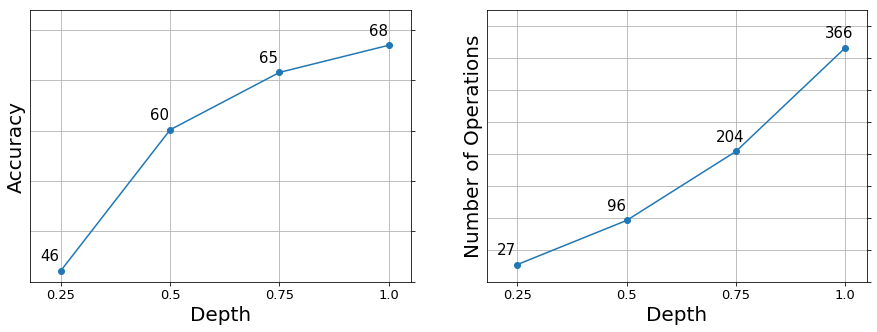

In [56]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

axes[0].yaxis.tick_right()
axes[0].set_xlabel('Depth', fontsize=20)
axes[0].set_xticks(plot_df['Depth'].values)
axes[0].set_xticklabels(plot_df['Depth'].values, fontdict= {'fontsize':13})
axes[0].set_ylabel('Accuracy', fontsize=20)
# axes[0].set_yticks([])
axes[0].set_yticklabels([])
axes[0].plot(plot_df['Depth'], plot_df['Top-1 Accuracy'], '-o')
axes[0].set_xlim(0.18, 1.05)
axes[0].set_ylim(45, 72)
for i, row in plot_df.iterrows():
        if pd.notnull(row['Top-1 Accuracy']):
            axes[0].annotate(int(row['Top-1 Accuracy']), xy=(row['Depth'], row['Top-1 Accuracy']), xytext=(-20, 10), textcoords="offset points",
                        horizontalalignment='top', color='black', size=15, alpha = 1)
axes[0].grid(True)

axes[1].yaxis.tick_right()
axes[1].set_xlabel('Depth', fontsize=20)
axes[1].set_xticks(plot_df['Depth'].values)
axes[1].set_xticklabels(plot_df['Depth'].values, fontdict= {'fontsize':13})
axes[1].set_ylabel('Number of Operations', fontsize=20)
# axes[1].set_yticks([])
axes[1].set_yticklabels([])
axes[1].plot(plot_df['Depth'], plot_df['Million MACs'], '-o')
axes[1].set_xlim(0.18, 1.05)
axes[1].set_ylim(0, 425)
for i, row in plot_df.iterrows():
        if pd.notnull(row['Million MACs']):
            axes[1].annotate(int(row['Million MACs']), xy=(row['Depth'], row['Million MACs']), xytext=(-20, 10), textcoords="offset points",
                        horizontalalignment='top', color='black', size=15, alpha = 1)
axes[1].grid(True)
plt.savefig('res/depth.svg')

In [18]:
plot_df = mobilenet_data.groupby(['Input Size'], as_index = False)['Top-1 Accuracy', 'Million MACs'].mean()
plot_df['Million MACs'] = plot_df['Million MACs'].astype('int')
plot_df['Top-1 Accuracy'] = plot_df['Top-1 Accuracy'].map(lambda x: np.round(x, 1))
plot_df['Input Size'] = plot_df['Input Size'].astype('int')
plot_df

,Input Size,Top-1 Accuracy,Million MACs
0,128,56.3,88
1,160,59.5,137
2,192,61.6,198
3,224,63.1,269


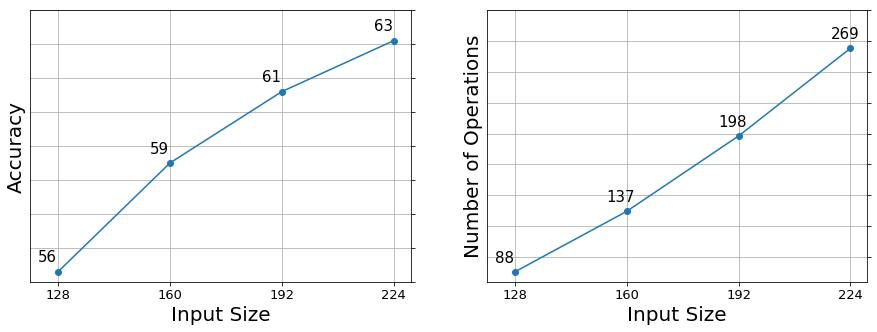

In [19]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

axes[0].yaxis.tick_right()
axes[0].set_xlabel('Input Size', fontsize=20)
axes[0].set_xticks(plot_df['Input Size'].values)
axes[0].set_xticklabels(plot_df['Input Size'].values, fontdict= {'fontsize':13})
axes[0].set_ylabel('Accuracy', fontsize=20)
# axes[0].set_yticks([])
axes[0].set_yticklabels([])
axes[0].plot(plot_df['Input Size'], plot_df['Top-1 Accuracy'], '-o')
axes[0].set_xlim(120)
axes[0].set_ylim(56, 64)
for i, row in plot_df.iterrows():
        if pd.notnull(row['Top-1 Accuracy']):
            axes[0].annotate(int(row['Top-1 Accuracy']), xy=(row['Input Size'], row['Top-1 Accuracy']), xytext=(-20, 10), textcoords="offset points",
                        horizontalalignment='top', color='black', size=15, alpha = 1)
axes[0].grid(True)

axes[1].yaxis.tick_right()
axes[1].set_xlabel('Input Size', fontsize=20)
axes[1].set_xticks(plot_df['Input Size'].values)
axes[1].set_xticklabels(plot_df['Input Size'].values, fontdict= {'fontsize':13})
axes[1].set_ylabel('Number of Operations', fontsize=20)
# axes[1].set_yticks([])
axes[1].set_yticklabels([])
axes[1].plot(plot_df['Input Size'], plot_df['Million MACs'], '-o')
axes[1].set_xlim(120)
axes[1].set_ylim(80, 300)
for i, row in plot_df.iterrows():
        if pd.notnull(row['Million MACs']):
            axes[1].annotate(int(row['Million MACs']), xy=(row['Input Size'], row['Million MACs']), xytext=(-20, 10), textcoords="offset points",
                        horizontalalignment='top', color='black', size=15, alpha = 1)
axes[1].grid(True)
plt.savefig('res/input_size.svg')

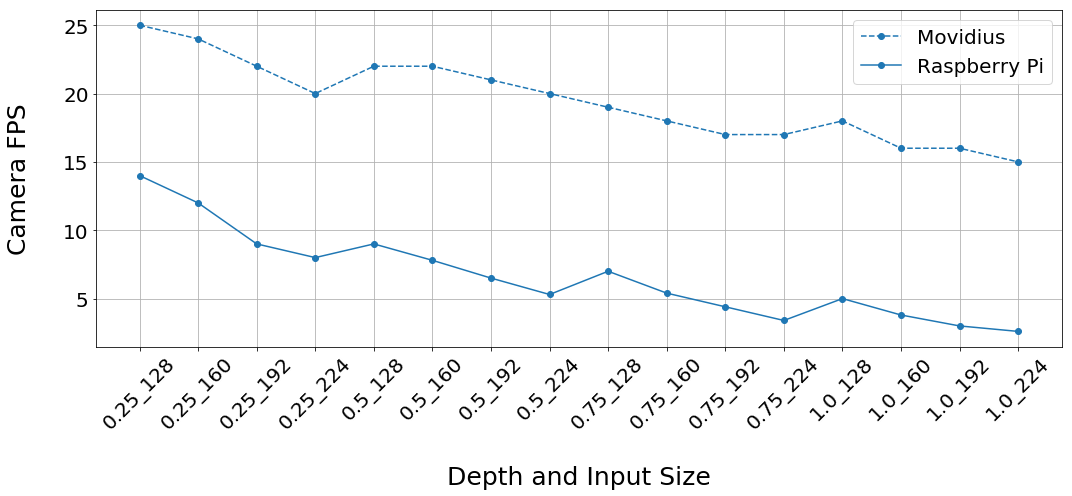

In [31]:
x = exp_results['x'].values#[::-1]
y = exp_results['r_fps'].values#[::-1]
ym = exp_results['m_fps'].values#[::-1]

tick_size = 20
label_size = 25
legend_size = 20

plt.figure(figsize=(15, 7))
plt.xlabel('\nDepth and Input Size', fontsize=label_size)
plt.xticks(rotation=45, fontsize=tick_size)
plt.ylabel('Camera FPS\n', fontsize=label_size)
plt.yticks(fontsize=tick_size)

plt.plot(x, ym, '--o', label = 'Movidius')
plt.plot(x, y, '-o', color='C0', label = 'Raspberry Pi')

plt.grid(True)
plt.tight_layout()

plt.legend(fontsize=legend_size)
plt.savefig('res/fps.svg')

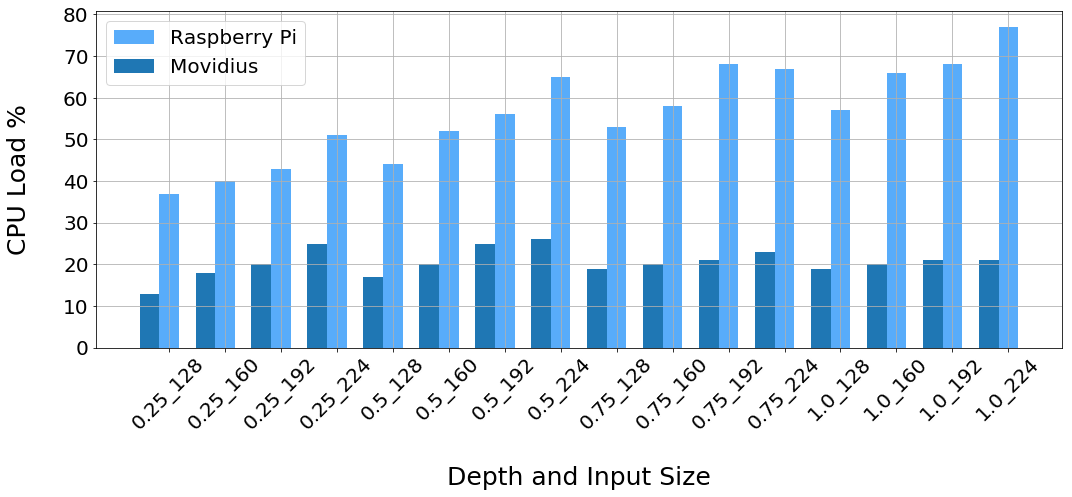

In [66]:
bar_width = 0.35

x = exp_results['x'].values
x1 = np.arange(len(x))
x2 = [x + bar_width for x in x1]

y = exp_results['r_cpu_load'].values
ym = exp_results['m_cpu_load'].values

tick_size = 20
label_size = 25
legend_size = 20

plt.figure(figsize=(15, 7))
plt.xlabel('\nDepth and Input Size', fontsize=label_size)
plt.xticks([r + bar_width for r in range(len(x))], x, rotation=45, fontsize=tick_size)
plt.ylabel('CPU Load %\n', fontsize=label_size)
plt.yticks(fontsize=tick_size)

plt.bar(x2, y * 100, width=bar_width, color = '#58ACFA', label = 'Raspberry Pi')
plt.bar(x1, ym * 100, width=bar_width, color = 'C0', label = 'Movidius')

plt.grid(True)
plt.tight_layout()

plt.legend(fontsize=legend_size)
plt.savefig('res/cpu_load.svg')

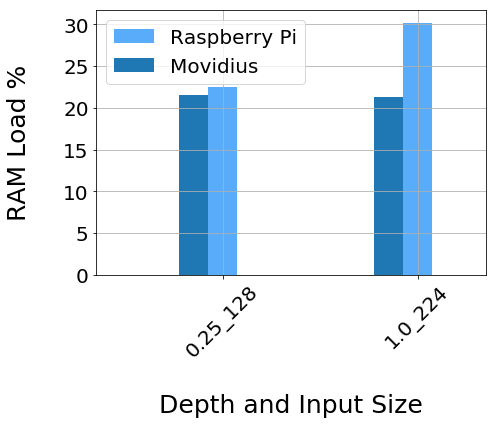

In [67]:
bar_width = 0.15

x = [exp_results['x'].values[0], exp_results['x'].values[-1]]
x1 = np.arange(len(x))
x2 = [x + bar_width for x in x1]

y = [exp_results['r_ram_load'].values[0] * 100, exp_results['r_ram_load'].values[-1] * 100]
ym = [exp_results['m_ram_load'].values[0] * 100, exp_results['m_ram_load'].values[-1] * 100]

tick_size = 20
label_size = 25
legend_size = 20

plt.figure(figsize=(7, 6))
plt.xlabel('\nDepth and Input Size', fontsize=label_size)
plt.xlim(-0.5, 1.5)
plt.xticks([r + bar_width for r in range(len(x))], x, rotation=45, fontsize=tick_size)
plt.ylabel('RAM Load %\n', fontsize=label_size)
plt.yticks(fontsize=tick_size)

plt.bar(x2, y, width=bar_width, color = '#58ACFA', label = 'Raspberry Pi')
plt.bar(x1, ym, width=bar_width, color = 'C0', label = 'Movidius')

plt.grid(True)
plt.tight_layout()

plt.legend(fontsize=legend_size)
plt.savefig('res/ram_load.svg')


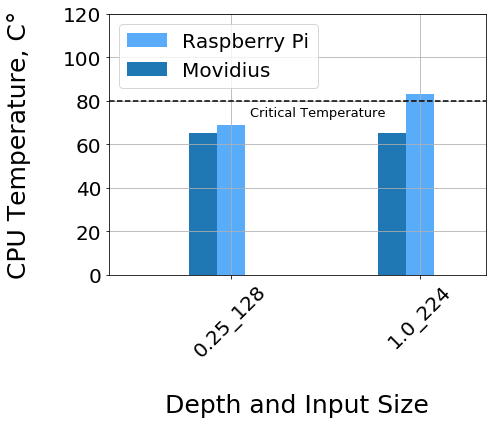

In [77]:
bar_width = 0.15

x = [exp_results['x'].values[0], exp_results['x'].values[-1]]
x1 = np.arange(len(x))
x2 = [x + bar_width for x in x1]

y = [exp_results['r_temp'].values[0], exp_results['r_temp'].values[-1]]
ym = [exp_results['m_temp'].values[0], exp_results['m_temp'].values[-1]]

tick_size = 20
label_size = 25
legend_size = 20

plt.figure(figsize=(7, 6))
plt.xlabel('\nDepth and Input Size', fontsize=label_size)
plt.ylim(0, 120)
plt.xlim(-0.5, 1.5)
plt.xticks([r + bar_width for r in range(len(x))], x, rotation=45, fontsize=tick_size)
plt.ylabel('CPU Temperature, C°\n', fontsize=label_size)
plt.yticks(fontsize=tick_size)

plt.bar(x2, y, width=bar_width, color = '#58ACFA', label = 'Raspberry Pi')
plt.bar(x1, ym, width=bar_width, color = 'C0', label = 'Movidius')
plt.plot([i for i in np.arange(-0.5, 2.5, 0.1)], [80 for _ in range(len(np.arange(-0.5, 2.5, 0.1)))], '--', color = 'black', label = None)

plt.text(0.25, 73, 'Critical Temperature', fontsize=13)
# plt.text(0.5, 78, ' Critical Temperature', fontsize=13)

plt.grid(True)
plt.tight_layout()

plt.legend(fontsize=legend_size, loc='upper left')
plt.savefig('res/cpu_temp.svg')